In [1]:
import pandas as pd

df = pd.read_parquet("../result/penguins.parquet")
df

,Species,Island,Individual_ID,Date_Egg,Culmen_Length,Culmen_Depth,Flipper_Length,Body_Mass,Sex,Comments,Species_Short
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A1,2007-11-11,39.1,18.7,181.0,3750.0,MALE,Not enough blood for isotopes.,Adelie
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A2,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,None,Adelie
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A1,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,None,Adelie
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A2,2007-11-16,NaN,NaN,NaN,NaN,NaN,Adult not sampled.,Adelie
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,N3A1,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,None,Adelie
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap penguin (Pygoscelis antarctica),Dream,N98A2,2009-11-19,55.8,19.8,207.0,4000.0,MALE,None,Chinstrap
340,Chinstrap penguin (Pygoscelis antarctica),Dream,N99A1,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,Nest never observed with full clutch.,Chinstrap
341,Chinstrap penguin (Pygoscelis antarctica),Dream,N99A2,2009-11-21,49.6,18.2,193.0,3775.0,MALE,Nest never observed with full clutch.,Chinstrap
342,Chinstrap penguin (Pygoscelis antarctica),Dream,N100A1,2009-11-21,50.8,19.0,210.0,4100.0,MALE,None,Chinstrap


In [8]:
# value_counts()による分布の確認
df.loc[:, "Sex"].value_counts(dropna=False)

Sex
MALE      168
FEMALE    165
NaN        11
Name: count, dtype: int64

In [3]:
df.loc[:, "Sex"].value_counts(dropna=False, ascending=True)

Sex
NaN        11
FEMALE    165
MALE      168
Name: count, dtype: int64

In [4]:
df.loc[:, "Sex"].value_counts(dropna=False, sort=False)

Sex
FEMALE    165
MALE      168
NaN        11
Name: count, dtype: int64

In [6]:
df.loc[:, "Sex"].value_counts(dropna=False, sort=False, ascending=True)

Sex
FEMALE    165
MALE      168
NaN        11
Name: count, dtype: int64

In [7]:
df.loc[:, "Sex"].value_counts(dropna=False, normalize=True)

Sex
MALE      0.488372
FEMALE    0.479651
NaN       0.031977
Name: proportion, dtype: float64

In [9]:
# ヒストグラムによる分布の確認
import plotly.express as px

px.histogram(df, x="Flipper_Length")

In [11]:
# cut()による分割
flipper_range = pd.cut(
    df.loc[:, "Flipper_Length"],
    bins=[0, 205, 300],
)
df.groupby(flipper_range, observed=True)["Species_Short"].value_counts()

Flipper_Length  Species_Short
(0, 205]        Adelie           149
                Chinstrap         62
                Gentoo             1
(205, 300]      Gentoo           122
                Chinstrap          6
                Adelie             2
Name: count, dtype: int64

In [12]:
px.histogram(df, x="Flipper_Length", nbins=4)

<Axes: ylabel='Frequency'>

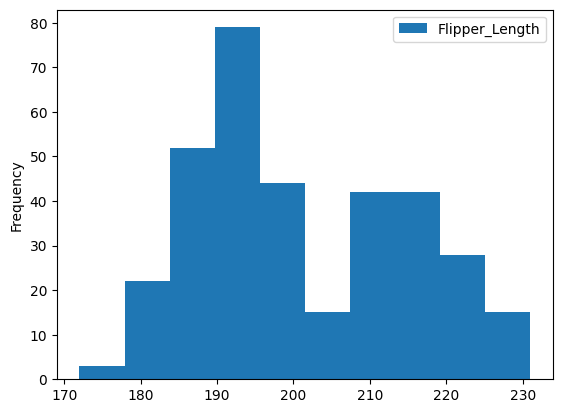

In [13]:
df.plot(
    y="Flipper_Length",
    kind="hist",
)

<Axes: ylabel='Frequency'>

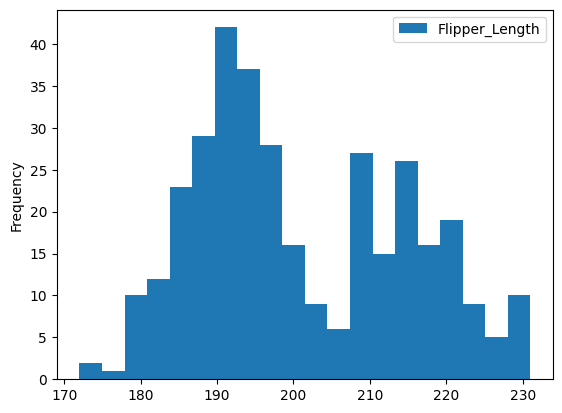

In [14]:
df.plot(
    y="Flipper_Length",
    kind="hist",
    bins=20,
)

In [16]:
import numpy as np

bin_edges = np.histogram_bin_edges(
    df.loc[:, "Flipper_Length"].dropna(),
    bins="auto",
)
bin_edges

array([172. , 177.9, 183.8, 189.7, 195.6, 201.5, 207.4, 213.3, 219.2,
       225.1, 231. ])

<Axes: ylabel='Frequency'>

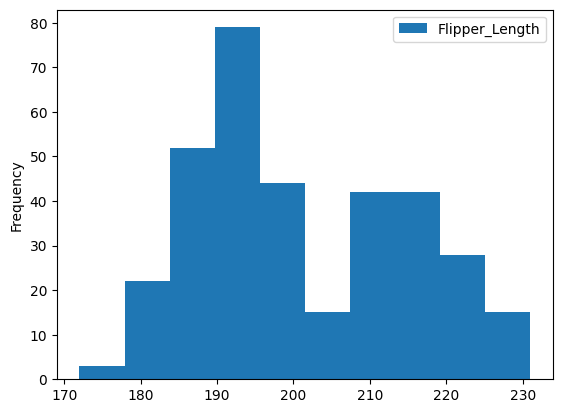

In [17]:
df.plot(
    y="Flipper_Length",
    kind="hist",
    bins=bin_edges,
)

In [19]:
# 散布図による分布の確認
px.scatter(
    df,
    x="Culmen_Length",
    y="Flipper_Length",
    color="Species_Short",
    color_discrete_sequence=px.colors.sequential.Agsunset,
    symbol="Species_Short",
)

In [21]:
# 相関係数
df.groupby("Species_Short", observed=True)[["Culmen_Length", "Flipper_Length"]].corr()

Culmen_Length  Flipper_Length
Species_Short                                              
Adelie        Culmen_Length        1.000000        0.325785
              Flipper_Length       0.325785        1.000000
Chinstrap     Culmen_Length        1.000000        0.471607
              Flipper_Length       0.471607        1.000000
Gentoo        Culmen_Length        1.000000        0.661162
              Flipper_Length       0.661162        1.000000